In [1]:
import numpy as np
import matplotlib.pyplot as plt

1D Metropolis-Hastings Gaussian Random Walk:
- Use Gaussian as proposal
- Symmetry of proposal means we can use unnormalised target density alone in computing Hastings ratio

In [2]:
def grw_metropolis_hastings_1D(target_density, x0, n_iters, sigma):
    xt = x0
    chain = []
    n_accept = 0
    for t in range(n_iters):
        yt = xt + np.random.normal(loc=0, scale=sigma)
        hastings_ratio = target_density(yt) / target_density(xt)
        alpha = min(hastings_ratio, 1)
        u = np.random.uniform(low=0, high=1)
        if u < alpha:
            xt = yt
            n_accept += 1
        chain.append(xt)
    acceptance_ratio = n_accept / n_iters
    return chain, acceptance_ratio

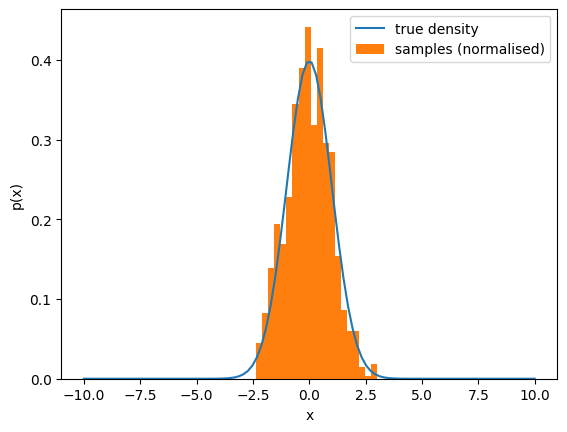

In [3]:
standard_gaussian_target = lambda x: np.exp(-0.5*x**2)
chain, acc_ratio = grw_metropolis_hastings_1D(target_density=standard_gaussian_target, x0=0, n_iters=1000, sigma=1)
xrange = np.linspace(-10,10,100)
plt.plot(xrange, standard_gaussian_target(xrange)*(2*np.pi)**-0.5, label="true density")
plt.hist(chain, bins=20, density="probability", label="samples (normalised)")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.legend()
plt.show()

- MH-GRW algorithm better targets the target distribution as length of the chain increases

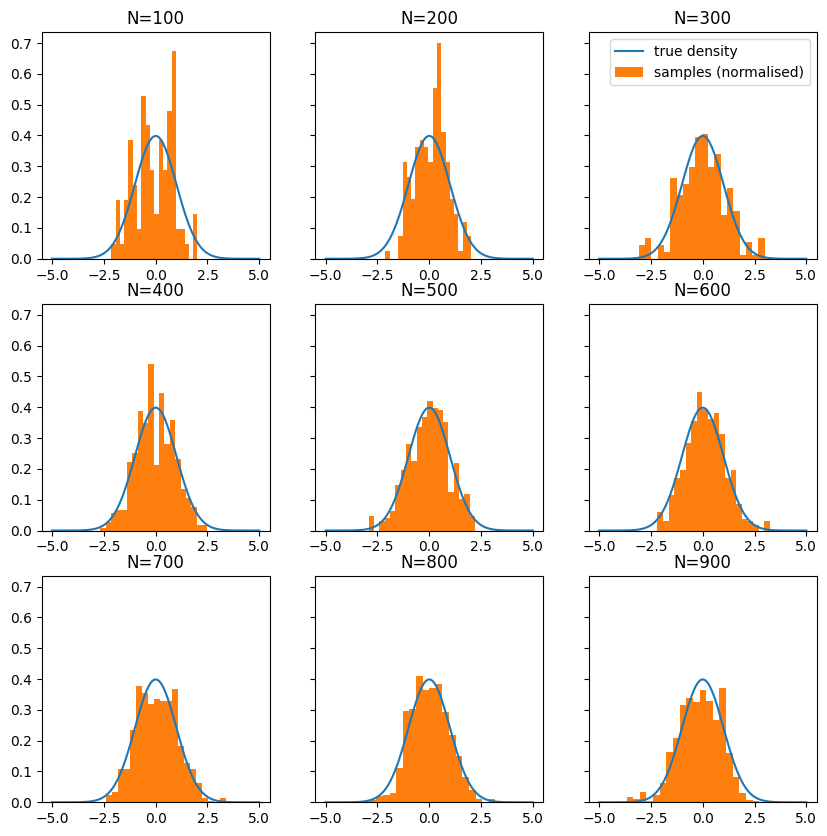

In [4]:
fig, axs = plt.subplots(3,3, figsize=(10, 10), sharey=True)
xrange = np.linspace(-5,5,100)
for ax, n in zip(axs.flat, range(100,1000, 100)):
    chain, acc_ratio = grw_metropolis_hastings_1D(target_density=standard_gaussian_target, x0=0, n_iters=n, sigma=1)
    ax.plot(xrange, standard_gaussian_target(xrange)*(2*np.pi)**-0.5, label="true density", ms=4)
    ax.hist(chain, bins=20, density="probability", label="samples (normalised)")
    ax.set_title(f"N={n}")
axs[0][-1].legend()

- Accuracy of approximation decreases as stepsize sigma becomes too large or too small

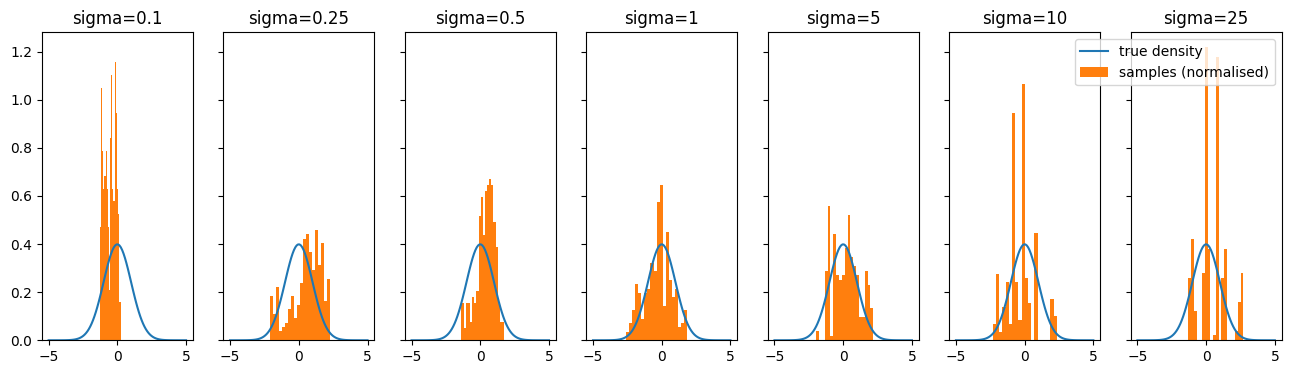

In [69]:
fig, axs = plt.subplots(1,7, figsize=(16,4), sharey=True)
xrange = np.linspace(-5,5,100)
for ax, sigma in zip(axs.flat, [0.1, 0.25, 0.5, 1, 5, 10, 25]):
    chain, acc_ratio = grw_metropolis_hastings_1D(target_density=standard_gaussian_target, x0=0, n_iters=250, sigma=sigma)
    ax.plot(xrange, standard_gaussian_target(xrange)*(2*np.pi)**-0.5, label="true density")
    ax.hist(chain, bins=20, density="probability", label="samples (normalised)")
    ax.set_title(f"sigma={sigma}")
axs[-1].legend()

- This happens because:
    - When sigma is too small, positions in chain are two similar and chain takes too long to explore; this means samples are too correlated and we get poor MC estimates --> slow mixing
    - When sigma is too large, will be mostly stepping into regions of lower density that will get rejected; this means positions in chain are highly correlated and we get poor MC estimates --> slow mixing

Text(0.5, 0, 't')

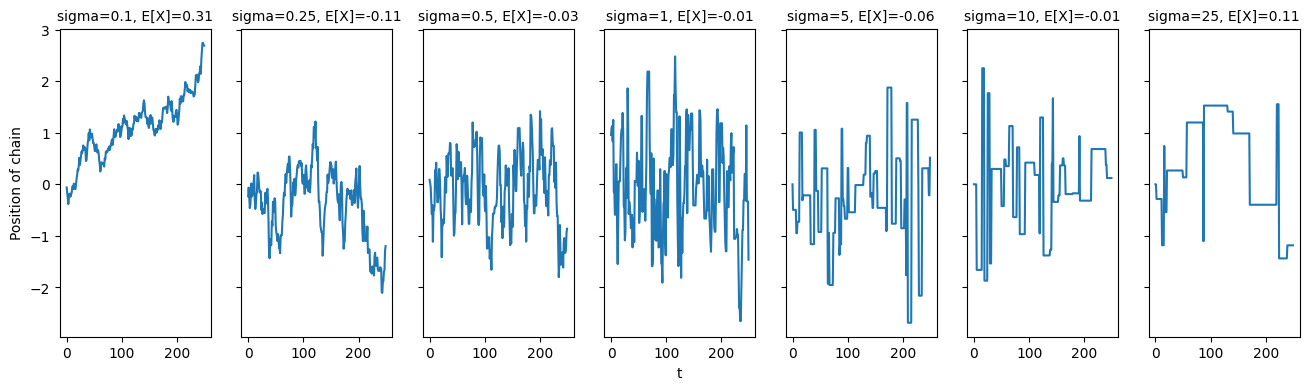

In [101]:
fig, axs = plt.subplots(1,7, figsize=(16,4), sharey=True)
xrange = np.linspace(-5,5,100)
for ax, sigma in zip(axs.flat, [0.1, 0.25, 0.5, 1, 5, 10, 25]):
    chain, acc_ratio = grw_metropolis_hastings_1D(target_density=standard_gaussian_target, x0=0, n_iters=250, sigma=sigma)
    ax.plot(chain)
    ax.set_title(f"sigma={sigma}, E[X]={sum(chain)/n:.2f}", fontsize=10)
axs[0].set_ylabel("Position of chain")
axs[3].set_xlabel("t")

Text(0, 0.5, 'MH-GRW Acceptance Rate')

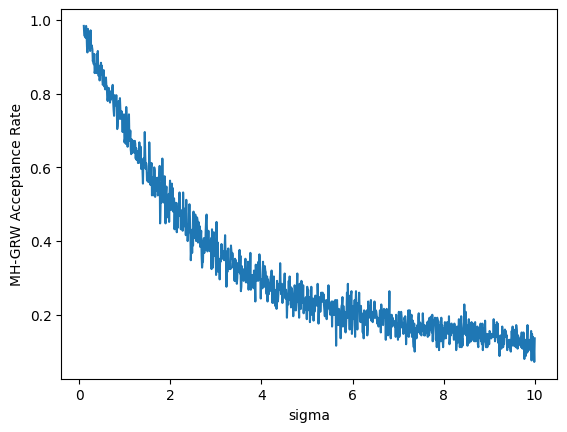

In [93]:
acc_ratios = []
for sigma in np.linspace(0.1, 10, 1000):
    chain, acc_ratio = grw_metropolis_hastings_1D(target_density=standard_gaussian_target, x0=0, n_iters=250, sigma=sigma)
    acc_ratios.append(acc_ratio)
plt.plot(np.linspace(0.1, 10, 1000), acc_ratios)
plt.xlabel("sigma")
plt.ylabel("MH-GRW Acceptance Rate")

- Starting position of chain matters - if we start in a region of low density, takes time to converge to desired distribution and get worse MC estimates if we keep early samples

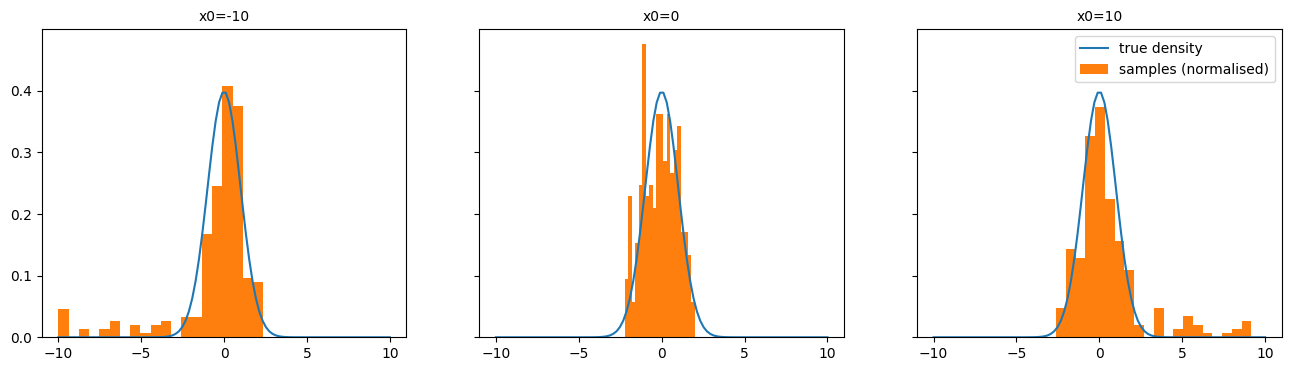

In [130]:
fig, axs = plt.subplots(1,3, figsize=(16,4), sharey=True)
xrange = np.linspace(-10,10,100)
for ax, x0 in zip(axs.flat, [-10, 0, 10]):
    chain, acc_ratio = grw_metropolis_hastings_1D(target_density=standard_gaussian_target, x0=x0, n_iters=250, sigma=1)
    ax.plot(xrange, standard_gaussian_target(xrange)*(2*np.pi)**-0.5, label="true density")
    ax.hist(chain, bins=20, density="probability", label="samples (normalised)")
    ax.set_title(f"x0={x0}", fontsize=10)
axs[-1].legend()

Text(0.5, 0, 't')

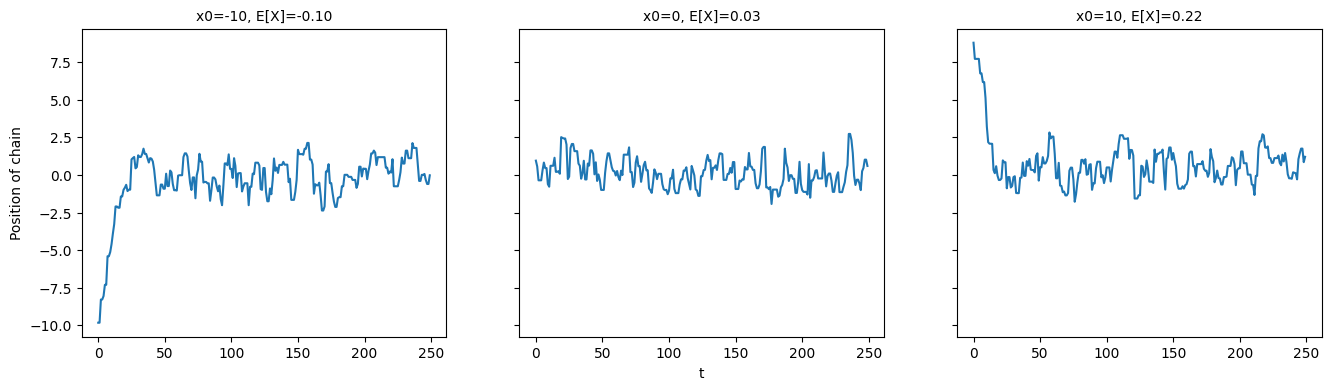

In [134]:
fig, axs = plt.subplots(1,3, figsize=(16,4), sharey=True)
for ax, x0 in zip(axs.flat, [-10,0,10]):
    chain, acc_ratio = grw_metropolis_hastings_1D(target_density=standard_gaussian_target, x0=x0, n_iters=250, sigma=1)
    ax.plot(chain)
    ax.set_title(f"x0={x0}, E[X]={sum(chain)/n:.2f}", fontsize=10)
axs[0].set_ylabel("Position of chain")
axs[1].set_xlabel("t")

Problem - when target is multimodal, chain takes a long time to explore all regions of high density

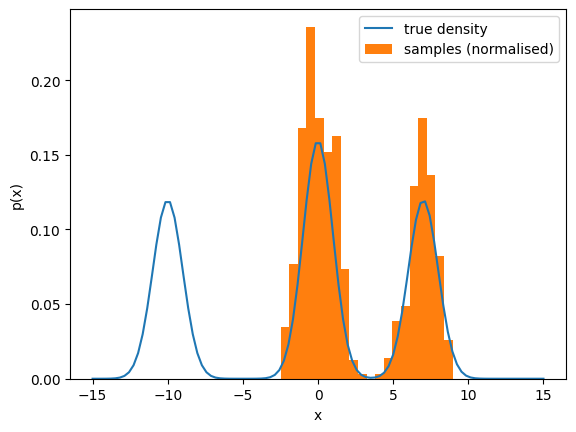

In [7]:
gmm_target = lambda x: 0.4*np.exp(-0.5*x**2) + 0.3*np.exp(-0.5*(x-7)**2) + + 0.3*np.exp(-0.5*(x+10)**2)
chain, acc_ratio = grw_metropolis_hastings_1D(target_density=gmm_target, x0=0, n_iters=1000, sigma=1)
xrange = np.linspace(-15,15,100)
plt.plot(xrange, gmm_target(xrange)*(2*np.pi)**-0.5, label="true density")
plt.hist(chain, bins=20, density="probability", label="samples (normalised)")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.legend()
plt.show()

- Can explore closer mode if N large enough, struggles to explore far mode

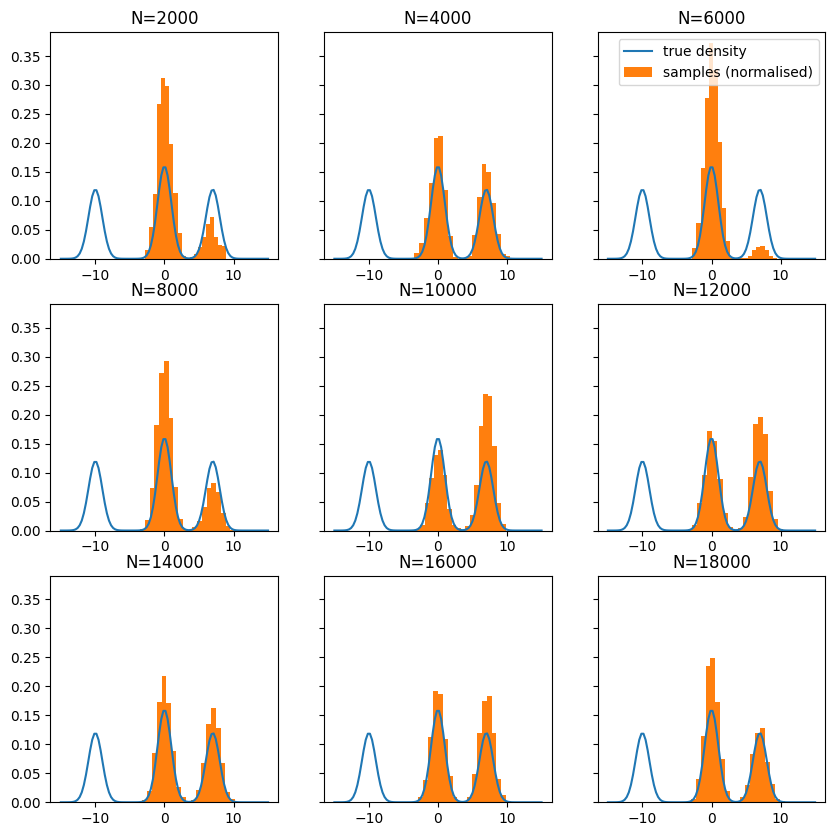

In [182]:
fig, axs = plt.subplots(3,3, figsize=(10, 10), sharey=True)
xrange = np.linspace(-15,15,100)
for ax, n in zip(axs.flat, range(2000,20000, 2000)):
    chain, acc_ratio = grw_metropolis_hastings_1D(target_density=gmm_target, x0=0, n_iters=n, sigma=1)
    ax.plot(xrange, gmm_target(xrange)*(2*np.pi)**-0.5, label="true density", ms=4)
    ax.hist(chain, bins=20, density="probability", label="samples (normalised)")
    ax.set_title(f"N={n}")
axs[0][-1].legend()

- Larger steps help but come at cost of reduced acceptance rate (causing slower mixing and worse MC estimates)

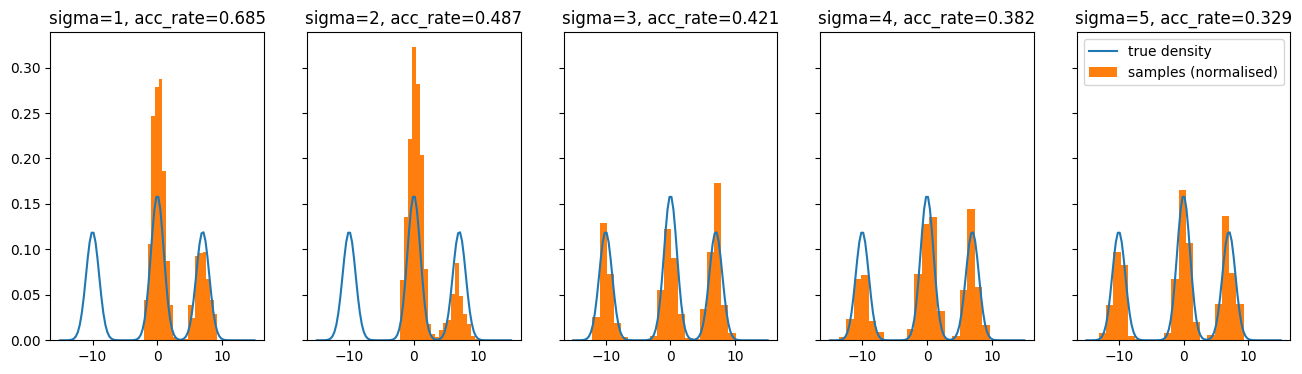

In [16]:
fig, axs = plt.subplots(1,5, figsize=(16,4), sharey=True)
xrange = np.linspace(-15,15,100)
for ax, sigma in zip(axs.flat, [1, 2, 3, 4, 5]):
    chain, acc_ratio = grw_metropolis_hastings_1D(target_density=gmm_target, x0=0, n_iters=1000, sigma=sigma)
    ax.plot(xrange, gmm_target(xrange)*(2*np.pi)**-0.5, label="true density")
    ax.hist(chain, bins=20, density="probability", label="samples (normalised)")
    ax.set_title(f"sigma={sigma}, acc_rate={acc_ratio}")
axs[-1].legend()

- Partial solution - use a mixture transition kernel

In [19]:
def mixture_grw_metropolis_hastings_1D(target_density, x0, n_iters, sigma_low, sigma_high, mixture_weight):
    xt = x0
    chain = []
    n_accept = 0
    for t in range(n_iters):
        yt = xt + mixture_weight * np.random.normal(loc=0, scale=sigma_low) + (1 - mixture_weight) * np.random.normal(loc=0, scale=sigma_high)
        hastings_ratio = target_density(yt) / target_density(xt)
        alpha = min(hastings_ratio, 1)
        u = np.random.uniform(low=0, high=1)
        if u < alpha:
            xt = yt
            n_accept += 1
        chain.append(xt)
    acceptance_ratio = n_accept / n_iters
    return chain, acceptance_ratio

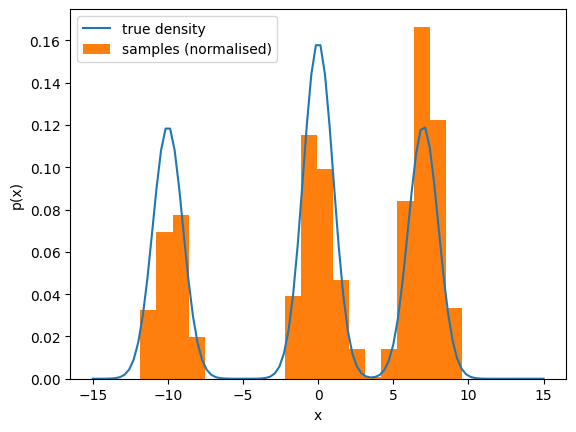

In [30]:
gmm_target = lambda x: 0.4*np.exp(-0.5*x**2) + 0.3*np.exp(-0.5*(x-7)**2) + + 0.3*np.exp(-0.5*(x+10)**2)
chain, acc_ratio = mixture_grw_metropolis_hastings_1D(target_density=gmm_target, x0=0, n_iters=1000, sigma_low=1, sigma_high=5, mixture_weight=0.5)
xrange = np.linspace(-15,15,100)
plt.plot(xrange, gmm_target(xrange)*(2*np.pi)**-0.5, label="true density")
plt.hist(chain, bins=20, density="probability", label="samples (normalised)")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.legend()
plt.show()